# Desafio CNN 

> ## Instalando o Keras e o URLLib

In [5]:
!pip install keras
!pip install urllib

  Could not find a version that satisfies the requirement urllib (from versions: )
No matching distribution found for urllib


> ## Importando as bibliotecas da CNN

In [0]:
import keras
from keras.models import Model
from keras.layers import *
from keras.optimizers import *
from google.colab import files

import urllib.request

import h5py

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

> ## Fazendo o download do dataset para o colaboratory

In [0]:
urllib.request.urlretrieve("http://infra.heurys.com.br:8080/files/dataset.zip", "dataset.h5")

> ## Carregando o dataset para as variáveis (20% para teste e 80% para treinamento)

In [8]:
with h5py.File('dataset.h5','r') as hf:
    X = hf['X'][:]
    y = hf['y'][:]
    X_test = hf['X_test'][:]
    
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

OSError: ignored

> ## Normalizando os dados 

In [4]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val  /= 255
X_test /= 255

X_train = X_train.reshape(-1,256,256,1)
X_val = X_val.reshape(-1,256,256,1)
X_test = X_test.reshape(-1,256,256,1)

NameError: ignored

> ## Definição da CNN

In [3]:
inputs = Input((256, 256,1))

Conv = Conv2D(1, kernel_size=(3,3), strides=(5, 5), padding='same', activation='relu')(inputs)
Conv = Conv2D(1, kernel_size=(3,3), strides=(5, 5), padding='same', activation='relu')(Conv)

flat = Flatten()(Conv)

dense = Dense(8,activation = 'sigmoid')(flat)
dense = Dense(1, activation = 'sigmoid')(dense)

model = Model(inputs, dense)
model.compile(loss='mean_squared_error',optimizer=SGD(lr=4.0), metrics=['acc'])
model.summary()

NameError: ignored

> ## Treinamento da CNN

In [0]:
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 120 samples, validate on 30 samples
Epoch 1/10


> ## Exibe o gráfico de erro e acurácia

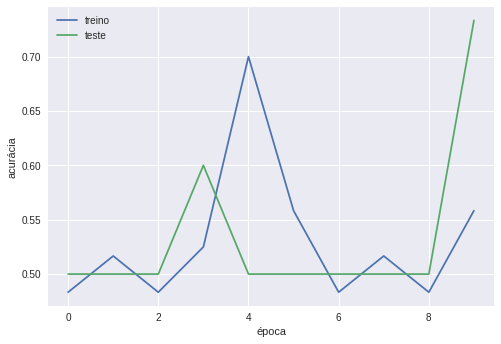

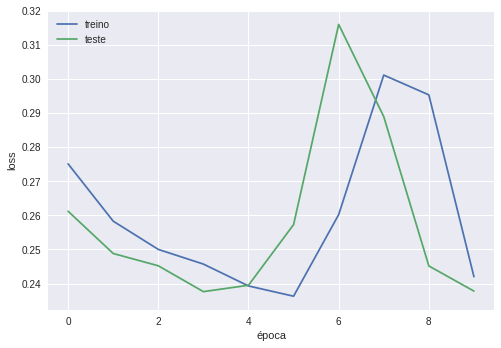

---- Summary ----
train loss.....: 0.2350998173 train accuracy.....: 0.6583333294
validation loss: 0.237789318 validation accuracy: 0.7333333492


In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

train_score = model.evaluate(X_train, y_train, verbose=0)
val_score = model.evaluate(X_val, y_val, verbose=0)
print('---- Summary ----')
print('train loss.....:', train_score[0].round(10), 'train accuracy.....:', train_score[1].round(10))
print('validation loss:', val_score[0].round(10),   'validation accuracy:', val_score[1].round(10))


> ## Resultado da rede (Salvar o conteúdo em um arquivo csv e enviar para avaliação) - Serão apenas 3 tentativas consideradas

In [2]:
#pred = model.predict(X_test)
#np.savetxt('result.csv', pred)
#files.download('result.csv')

NameError: ignored